In [1]:
# Nativos
import random as rn
import os
import sys
import gc

#calculo
import numpy as np
import pandas as pd
import scipy

#grafico
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline
sns.set(style="whitegrid")

#warning ignore future
import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")
gc.collect()

SEED = 29082013
os.environ['PYTHONHASHSEED'] = str(SEED)
np.random.seed(SEED)
rn.seed(SEED)

In [2]:
#nativos
import os
import unicodedata

#terceros
import pandas as pd
#import pymssql
#import missingno as msno
from collections import Counter
import scorecardpy as sc

#grafico
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline
sns.set(style="whitegrid")

In [3]:
data = pd.read_csv('AVANCE_5.csv', dtype={
    'COD_UNICO': str,
    'PERIODO': str
})
data.head()

,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,TIENE_MENORIGUAL_0.9_U1M_2M_OVER_U12M_U11M_RIESGO_PROMEDIO_INDIRECTO_CIERRE,TIENE_MENORIGUAL_0.85_U1M_2M_OVER_U12M_U11M_RIESGO_PROMEDIO_INDIRECTO_CIERRE,TIENE_MENORIGUAL_0.8_U1M_2M_OVER_U12M_U11M_RIESGO_PROMEDIO_INDIRECTO_CIERRE,TIENE_MENORIGUAL_0.75_U1M_2M_OVER_U12M_U11M_RIESGO_PROMEDIO_INDIRECTO_CIERRE,TIENE_MENORIGUAL_0.7_U1M_2M_OVER_U12M_U11M_RIESGO_PROMEDIO_INDIRECTO_CIERRE,TIENE_MENORIGUAL_0.65_U1M_2M_OVER_U12M_U11M_RIESGO_PROMEDIO_INDIRECTO_CIERRE,TIENE_MENORIGUAL_0.6_U1M_2M_OVER_U12M_U11M_RIESGO_PROMEDIO_INDIRECTO_CIERRE,TIENE_MENORIGUAL_0.55_U1M_2M_OVER_U12M_U11M_RIESGO_PROMEDIO_INDIRECTO_CIERRE,TIENE_MENORIGUAL_0.5_U1M_2M_OVER_U12M_U11M_RIESGO_PROMEDIO_INDIRECTO_CIERRE,TIENE_MENORIGUAL_0.45_U1M_2M_OVER_U12M_U11M_RIESGO_PROMEDIO_INDIRECTO_CIERRE
0,202008,0002225225,20170717261,1,RUMI IMPORT,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,202008,0004039624,10010600338,0,REATEGUI FLORES LUCAS,0,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,202008,0004017117,20293331066,1,PRECISION PERU,1,1,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,202008,0003980042,20101391397,0,COMERCIAL INDUSTRIAL DELTA,1,0,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,202008,0003290442,20100244129,1,AGRICOLA COMERCIAL E INDUSTRIAL,1,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.shape

(24014, 2956)

### >> Descarte de columnas de listado

In [5]:
for column in [col for col in data.columns if 'listado' in col.lower()]:
    print(column)
    del data[column]

listado_cierre_x
listado_cierre_y
listado_cierre_x.1
listado_cierre_y.1


## >> SEVERIDAD EN TARGETS

<AxesSubplot:>

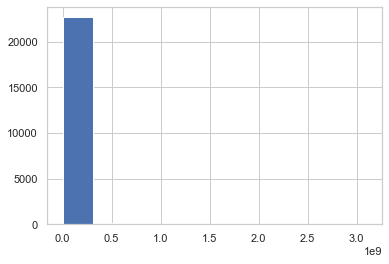

In [6]:
# COLOCACIONES DIRECTAS ... vigentes y vencidos ... que cumplan lineamientos de mercado 
## OJO descartamos la categoria OTROS del RCC Y la categoria TARJETAS DE CREDITO para BE acoder a lso reporretes generadas a la banca
## lineamieto de mercado :
## Entidad se encuente vigente 
## No se encuentre eun lista negra
## No tenga relacion directa con el estado

data['DEUDA_TOTAL_RCC'].hist()

In [7]:
data[['PERCENT_DELAY_OVER_DEBT_RCC', 'MTO_ATRASO_NOLETRAS', 'DEUDA_TOTAL_RCC']].head(1)

,PERCENT_DELAY_OVER_DEBT_RCC,MTO_ATRASO_NOLETRAS,DEUDA_TOTAL_RCC
0,0.04687,433698.0,9253118.94


<AxesSubplot:>

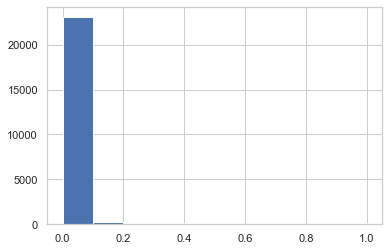

In [8]:
data['MTO_ATRASO_NOLETRAS'] = data['MTO_ATRASO_NOLETRAS'].fillna(0)
data['DEUDA_TOTAL_RCC'] = data['DEUDA_TOTAL_RCC'].fillna(0)

def div_simplex(a, b):
    if pd.isnull(b) or b == 0:
        return 0
    
    return a / b

data['PERCENT_DELAY_OVER_DEBT_RCC'] = data[['MTO_ATRASO_NOLETRAS', 'DEUDA_TOTAL_RCC']].apply(lambda _: div_simplex(_[0], _[1]), axis=1)
data['PERCENT_DELAY_OVER_DEBT_RCC'].hist()

In [9]:
data['ATRASONOLETRAS_MAYOR_1PERCENT_DEBT_TOTOAL_SF'] = data['PERCENT_DELAY_OVER_DEBT_RCC'].apply(lambda _: _ >= 0.01).astype(int)
data['ATRASONOLETRAS_MAYOR_2PERCENT_DEBT_TOTOAL_SF'] = data['PERCENT_DELAY_OVER_DEBT_RCC'].apply(lambda _: _ >= 0.02).astype(int)
data['ATRASONOLETRAS_MAYOR_3PERCENT_DEBT_TOTOAL_SF'] = data['PERCENT_DELAY_OVER_DEBT_RCC'].apply(lambda _: _ >= 0.03).astype(int)
data['ATRASONOLETRAS_MAYOR_4PERCENT_DEBT_TOTOAL_SF'] = data['PERCENT_DELAY_OVER_DEBT_RCC'].apply(lambda _: _ >= 0.04).astype(int)
data['ATRASONOLETRAS_MAYOR_5PERCENT_DEBT_TOTOAL_SF'] = data['PERCENT_DELAY_OVER_DEBT_RCC'].apply(lambda _: _ >= 0.05).astype(int)

In [10]:
['ATRASONOLETRAS_MAYOR_{}PERCENT_DEBT_TOTOAL_SF'.format(ii) for ii in range(1, 6)]

['ATRASONOLETRAS_MAYOR_1PERCENT_DEBT_TOTOAL_SF',
 'ATRASONOLETRAS_MAYOR_2PERCENT_DEBT_TOTOAL_SF',
 'ATRASONOLETRAS_MAYOR_3PERCENT_DEBT_TOTOAL_SF',
 'ATRASONOLETRAS_MAYOR_4PERCENT_DEBT_TOTOAL_SF',
 'ATRASONOLETRAS_MAYOR_5PERCENT_DEBT_TOTOAL_SF']

In [11]:
for col in ['ATRASONOLETRAS_MAYOR_{}PERCENT_DEBT_TOTOAL_SF'.format(ii) for ii in range(1, 6)]:
    print(">> ", col)
    display(
        pd.crosstab(
            data[data['MTO_ATRASO_NOLETRAS'] > 0 ][col], data[data['MTO_ATRASO_NOLETRAS'] > 0 ]['PERIODO']
        )
    )

>>  ATRASONOLETRAS_MAYOR_1PERCENT_DEBT_TOTOAL_SF


PERIODO,202008,202009,202010,202011,202012,202101,202102,202103,202104
ATRASONOLETRAS_MAYOR_1PERCENT_DEBT_TOTOAL_SF,,,,,,,,,
0,208,224,191,181,178,180,191,237,181
1,288,207,195,203,163,153,288,245,151


>>  ATRASONOLETRAS_MAYOR_2PERCENT_DEBT_TOTOAL_SF


PERIODO,202008,202009,202010,202011,202012,202101,202102,202103,202104
ATRASONOLETRAS_MAYOR_2PERCENT_DEBT_TOTOAL_SF,,,,,,,,,
0,247,253,213,205,200,202,211,264,193
1,249,178,173,179,141,131,268,218,139


>>  ATRASONOLETRAS_MAYOR_3PERCENT_DEBT_TOTOAL_SF


PERIODO,202008,202009,202010,202011,202012,202101,202102,202103,202104
ATRASONOLETRAS_MAYOR_3PERCENT_DEBT_TOTOAL_SF,,,,,,,,,
0,278,273,233,222,219,212,223,277,200
1,218,158,153,162,122,121,256,205,132


>>  ATRASONOLETRAS_MAYOR_4PERCENT_DEBT_TOTOAL_SF


PERIODO,202008,202009,202010,202011,202012,202101,202102,202103,202104
ATRASONOLETRAS_MAYOR_4PERCENT_DEBT_TOTOAL_SF,,,,,,,,,
0,303,284,247,241,231,222,238,290,210
1,193,147,139,143,110,111,241,192,122


>>  ATRASONOLETRAS_MAYOR_5PERCENT_DEBT_TOTOAL_SF


PERIODO,202008,202009,202010,202011,202012,202101,202102,202103,202104
ATRASONOLETRAS_MAYOR_5PERCENT_DEBT_TOTOAL_SF,,,,,,,,,
0,318,299,255,253,241,230,248,304,220
1,178,132,131,131,100,103,231,178,112


In [12]:
data.shape, data.groupby(['COD_UNICO', 'PERIODO']).size().shape

((24014, 2957), (24014,))

In [13]:
#data[['RFMClass_quartil',  'FM_category_quartil', 'RFMClass_septil', 'FM_category_septil']].head(3)

In [14]:
data['target_seguir_covid'].value_counts(dropna=False)

0.0    18349
NaN     5504
1.0      161
Name: target_seguir_covid, dtype: int64

In [15]:
data.replace([np.inf, -np.inf], np.nan)['target_seguir_covid'].value_counts(dropna=False)

0.0    18349
NaN     5504
1.0      161
Name: target_seguir_covid, dtype: int64

In [16]:
[col for col in data.columns if 'FUN' in col.upper()]

['FUNNEL_1', 'FUNNEL_2', 'FUNNEL_3', 'FUNNEL_4', 'FUNNEL_ALERTA']

## REVIEW FUNNNEL

In [17]:
pd.crosstab(data['FUNNEL_4'].fillna(-1), data['PERIODO'])

PERIODO,202008,202009,202010,202011,202012,202101,202102,202103,202104
FUNNEL_4,,,,,,,,,
0,546,667,706,721,713,758,772,747,749
1,1882,1832,1801,1773,1788,2134,2128,2156,2141


In [18]:
pd.crosstab(data['FUNNEL_ALERTA'].fillna(-1), data['PERIODO'])

PERIODO,202008,202009,202010,202011,202012,202101,202102,202103,202104
FUNNEL_ALERTA,,,,,,,,,
-1.0,2428,2499,2507,2494,2501,0,0,0,0
0.0,0,0,0,0,0,75,78,78,80
1.0,0,0,0,0,0,2817,2822,2825,2810


## TARGETS

In [19]:
data['target_seguircovid_reducir_salir'] = data[['target_feve_reducir_salir', 'target_seguir_covid']].apply(
    lambda _: None if pd.isnull(_[0]) or pd.isnull(_[1]) else (1 if _[0] == 1 or _[1] == 1 else 0), axis= 1
)

In [20]:
def convert_diganonal_number(cadena):
    if pd.isnull(cadena) or cadena == 'nulo':
        return None
    num = cadena.replace('_', '')
    return int(num[0])*int(num[1])

data['_int_FM_category_quartil'] = data['FM_category_quartil'].apply(convert_diganonal_number)
data['_intFM_category_septil'] = data['FM_category_septil'].apply(convert_diganonal_number)

In [21]:
#for col in [_ for _ in data.columns if  _.lower().startswith('target')]:
#    print(">"*100, col)
#    display(data[col].value_counts(dropna=False))
#    print(" ")

In [22]:
#data['GRUPO_ECON_TIENE_TENDENCIA_AUMENTO_CLASIF_NO_NORMAL_U7M'].value_counts()

In [23]:
[ col for col in data.describe(include=[object]).columns if (col.startswith('TIENE') or 'TENDENCIA' in col)and 'TICKET' not in col.upper()]

['TIENE_MAYOR_1_ULT_TRIM_OVER_TRIM_PASADO_RIESGO_DIRECTO_CIERRE_MES',
 'TIENE_MAYOR_1_U1M_2M_OVER_U12M_U11M__RIESGO_DIRECTO_CIERRE_MES',
 'TIENE_MAYOR_1_ULT_TRIM_OVER_TRIM_PASADO_RIESGO_INDIRECTO_CIERRE_MES',
 'TIENE_MAYOR_1_U1M_2M_OVER_U12M_U11M__RIESGO_INDIRECTO_CIERRE_MES',
 'TIENE_MAYOR_1_ULT_TRIM_OVER_TRIM_PASADO_RIESGO_PROMEDIO_DIRECTO_CIERRE',
 'TIENE_MAYOR_1_U1M_2M_OVER_U12M_U11M__RIESGO_PROMEDIO_DIRECTO_CIERRE',
 'TIENE_MAYOR_1_ULT_TRIM_OVER_TRIM_PASADO_RIESGO_PROMEDIO_INDIRECTO_CIERRE',
 'TIENE_MAYOR_1_U1M_2M_OVER_U12M_U11M__RIESGO_PROMEDIO_INDIRECTO_CIERRE']

In [24]:
cols_correct = []
for col in data.columns:
    if set(data[col].value_counts(dropna=False).index) == {True, False, np.nan}:
        cols_correct.append(col)
        
len(cols_correct)

8

In [25]:
for column in cols_correct:
    print(column, end=' ')
    try:
        data[column] = data[column].fillna(0).apply(
            lambda _: 1 if str(_).lower() == ('1','true') else (0 if str(_).lower() in ('false', '0') else int(_))
        ).astype(int)
        
        display(data[column].value_counts(dropna=False))
        print('/'*100, 'ok')
       
    except Exception as e:
        print("-"*100,"Error: ", str(e))

TIENE_MAYOR_1_ULT_TRIM_OVER_TRIM_PASADO_RIESGO_DIRECTO_CIERRE_MES 

0    20938
1     3076
Name: TIENE_MAYOR_1_ULT_TRIM_OVER_TRIM_PASADO_RIESGO_DIRECTO_CIERRE_MES, dtype: int64

//////////////////////////////////////////////////////////////////////////////////////////////////// ok
TIENE_MAYOR_1_U1M_2M_OVER_U12M_U11M__RIESGO_DIRECTO_CIERRE_MES 

0    16185
1     7829
Name: TIENE_MAYOR_1_U1M_2M_OVER_U12M_U11M__RIESGO_DIRECTO_CIERRE_MES, dtype: int64

//////////////////////////////////////////////////////////////////////////////////////////////////// ok
TIENE_MAYOR_1_ULT_TRIM_OVER_TRIM_PASADO_RIESGO_INDIRECTO_CIERRE_MES 

0    21622
1     2392
Name: TIENE_MAYOR_1_ULT_TRIM_OVER_TRIM_PASADO_RIESGO_INDIRECTO_CIERRE_MES, dtype: int64

//////////////////////////////////////////////////////////////////////////////////////////////////// ok
TIENE_MAYOR_1_U1M_2M_OVER_U12M_U11M__RIESGO_INDIRECTO_CIERRE_MES 

0    22667
1     1347
Name: TIENE_MAYOR_1_U1M_2M_OVER_U12M_U11M__RIESGO_INDIRECTO_CIERRE_MES, dtype: int64

//////////////////////////////////////////////////////////////////////////////////////////////////// ok
TIENE_MAYOR_1_ULT_TRIM_OVER_TRIM_PASADO_RIESGO_PROMEDIO_DIRECTO_CIERRE 

0    20814
1     3200
Name: TIENE_MAYOR_1_ULT_TRIM_OVER_TRIM_PASADO_RIESGO_PROMEDIO_DIRECTO_CIERRE, dtype: int64

//////////////////////////////////////////////////////////////////////////////////////////////////// ok
TIENE_MAYOR_1_U1M_2M_OVER_U12M_U11M__RIESGO_PROMEDIO_DIRECTO_CIERRE 

0    15907
1     8107
Name: TIENE_MAYOR_1_U1M_2M_OVER_U12M_U11M__RIESGO_PROMEDIO_DIRECTO_CIERRE, dtype: int64

//////////////////////////////////////////////////////////////////////////////////////////////////// ok
TIENE_MAYOR_1_ULT_TRIM_OVER_TRIM_PASADO_RIESGO_PROMEDIO_INDIRECTO_CIERRE 

0    21335
1     2679
Name: TIENE_MAYOR_1_ULT_TRIM_OVER_TRIM_PASADO_RIESGO_PROMEDIO_INDIRECTO_CIERRE, dtype: int64

//////////////////////////////////////////////////////////////////////////////////////////////////// ok
TIENE_MAYOR_1_U1M_2M_OVER_U12M_U11M__RIESGO_PROMEDIO_INDIRECTO_CIERRE 

0    22486
1     1528
Name: TIENE_MAYOR_1_U1M_2M_OVER_U12M_U11M__RIESGO_PROMEDIO_INDIRECTO_CIERRE, dtype: int64

//////////////////////////////////////////////////////////////////////////////////////////////////// ok


### MUTANDO VARIABLES

In [26]:
'COVID_ACOGIO_SUSPENSION_PERFECTA' in data.columns

True

In [27]:
'COVID_P_1_TE_AFECTO_COVID' in data.columns

True

In [28]:
'ES_ACTIVO' in data.columns

True

In [29]:
#try:
#    data = pd.get_dummies(data, drop_first=True, columns=['COVID_ACOGIO_SUSPENSION_PERFECTA', 'COVID_P_1_TE_AFECTO_COVID', 'ES_ACTIVO'])
#except Exception as e:
#    print("ERROR:::::: ", str(e))
#data.shape

In [30]:
'BACKLOG' in data.columns, 'ZONAL' in data.columns, 'TICKET_PROMEDIO_EN_RIESGO' in data.columns, 'CLASIF_SBS' in data.columns, 'LUGAR' in data.columns

(True, True, True, True, True)

In [31]:
'IMPACTO_COVID_FICHA' in data.columns, 'ACTIVIDAD' in data.columns, 'SEI_MCDO' in data.columns

(True, True, True)

In [32]:
if len([col for col in data.columns if 'LUGAR' in col.upper()]) == 1:
    nuevas = []
    
    for col in [
        'BACKLOG', 'ZONAL', 'TICKET_PROMEDIO_EN_RIESGO', 'CLASIF_SBS',
        'LUGAR', 'IMPACTO_COVID_FICHA', 'ACTIVIDAD', 'SEI_MCDO'
    ]:
        new_col = col + '_'
        data[new_col] = data[col].copy()
        nuevas.append(new_col)

    print(list(nuevas))
    data = pd.get_dummies(data, drop_first=False, columns=nuevas)
data.shape

['BACKLOG_', 'ZONAL_', 'TICKET_PROMEDIO_EN_RIESGO_', 'CLASIF_SBS_', 'LUGAR_', 'IMPACTO_COVID_FICHA_', 'ACTIVIDAD_', 'SEI_MCDO_']


(24014, 3017)

In [33]:
'FEVE' in data.columns

True

## >> FEVE

In [34]:
for col in [_ for _ in data.columns if 'target' in _.lower() and 'feve' in _.lower()]:

    display(
        pd.crosstab(
            data[col].fillna(-1), data['PERIODO']
        )
    )


PERIODO,202008,202009,202010,202011,202012,202101,202102,202103,202104
target_feve_reducir_salir,,,,,,,,,
-1.0,2428,111,122,120,123,159,158,160,161
0.0,0,2368,2373,2350,2358,2715,2720,2732,2729
1.0,0,20,12,24,20,18,22,11,0


PERIODO,202008,202009,202010,202011,202012,202101,202102,202103,202104
target_feve_reducir_salir_3Mbueno,,,,,,,,,
-1.0,2428,106,121,119,121,153,152,155,156
0.0,0,2373,2374,2351,2360,2721,2726,2737,2734
1.0,0,20,12,24,20,18,22,11,0


PERIODO,202008,202009,202010,202011,202012,202101,202102,202103,202104
target_feve_reducir_salir_2Mbueno,,,,,,,,,
-1.0,2428,106,121,117,120,153,151,152,153
0.0,0,2373,2374,2353,2361,2721,2727,2740,2737
1.0,0,20,12,24,20,18,22,11,0


PERIODO,202008,202009,202010,202011,202012,202101,202102,202103,202104
target_feve_reducir_salir_1Mbueno,,,,,,,,,
-1.0,2428,106,119,116,120,152,149,149,151
0.0,0,2373,2376,2354,2361,2722,2729,2743,2739
1.0,0,20,12,24,20,18,22,11,0


## >> 30 DÍAS

In [35]:
data['target_CONTRASTE_30_dias_atraso'] = data[['target_CONTRASTE_30_dias_atraso_ibk_2Mbueno', 'target_CONTRASTE_30_dias_atraso_RCC_2Mbueno']].apply(
    lambda _: None if pd.isnull(_[0]) or pd.isnull(_[1]) else (1 if _[0] == 1 or _[1] == 1 else 0) ,axis= 1
)

display(
    pd.crosstab(
        data['target_CONTRASTE_30_dias_atraso'].fillna(-1), data['PERIODO']
    )
)

PERIODO,202008,202009,202010,202011,202012,202101,202102,202103,202104
target_CONTRASTE_30_dias_atraso,,,,,,,,,
-1.0,2428,230,209,171,152,164,149,137,136
0.0,0,2190,2227,2258,2284,2672,2679,2716,2743
1.0,0,79,71,65,65,56,72,50,11


## >> 15 DÍAS

In [36]:
[col for col in data.columns if 'target' in col.lower() and '15' in col.lower()]

['target_8_dias_atraso_seguido_ibk_2Mbueno_15000',
 'target_15_dias_atraso',
 'target_15_dias_atraso_2Mbueno',
 'target_15_dias_atraso_1Mbueno',
 'target_rcc_15_dias_atraso',
 'target_SF_15_dias_atraso_o_mas',
 'target_rcc_15_dias_atraso_2Mbueno',
 'target_SF_15_dias_atraso_o_mas_2Mbueno',
 'target_rcc_8_dias_atraso_seguido_2Mbueno_15000',
 'target_SF_8_dias_atraso_o_mas_SEGUIDO_2Mbueno_15000']

In [37]:
pd.crosstab(
    data['target_SF_15_dias_atraso_o_mas'].fillna(-1), data['PERIODO']
)

PERIODO,202008,202009,202010,202011,202012,202101,202102,202103,202104
target_SF_15_dias_atraso_o_mas,,,,,,,,,
-1.0,2428,773,669,560,530,517,471,426,411
0.0,0,1680,1778,1872,1921,2316,2350,2423,2475
1.0,0,46,60,62,50,59,79,54,4


In [38]:
pd.crosstab(
    data['target_SF_15_dias_atraso_o_mas_2Mbueno'].fillna(-1), data['PERIODO']
)

PERIODO,202008,202009,202010,202011,202012,202101,202102,202103,202104
target_SF_15_dias_atraso_o_mas_2Mbueno,,,,,,,,,
-1.0,2428,347,288,250,232,216,211,209,229
0.0,0,2055,2114,2153,2183,2573,2564,2615,2653
1.0,0,97,105,91,86,103,125,79,8


In [39]:
data['target_fusion_atraso_15_feve_all'] = data[['target_SF_15_dias_atraso_o_mas', 'target_seguircovid_reducir_salir']].apply(
    lambda _: None if pd.isnull(_[0]) or pd.isnull(_[1]) else (1 if _[0] == 1 or _[1] == 1 else 0) ,axis= 1
)
display(
    pd.crosstab(
        data['target_fusion_atraso_15_feve_all'].fillna(-1), data['PERIODO']
    )
)

PERIODO,202008,202009,202010,202011,202012,202101,202102,202103,202104
target_fusion_atraso_15_feve_all,,,,,,,,,
-1.0,2428,907,825,743,717,776,745,714,708
0.0,0,1537,1618,1686,1724,2048,2065,2133,2180
1.0,0,55,64,65,60,68,90,56,2


In [40]:
data['target_fusion_atraso_15_feve_all_2Mbueno'] = data[
    ['target_SF_15_dias_atraso_o_mas_2Mbueno', 'target_seguircovid_reducir_salir_2Mbueno']
].apply(
    lambda _: None if pd.isnull(_[0]) or pd.isnull(_[1]) else (1 if _[0] == 1 or _[1] == 1 else 0) ,axis= 1
)

display(
    pd.crosstab(
        data['target_fusion_atraso_15_feve_all_2Mbueno'].fillna(-1), data['PERIODO']
    )
)

PERIODO,202008,202009,202010,202011,202012,202101,202102,202103,202104
target_fusion_atraso_15_feve_all_2Mbueno,,,,,,,,,
-1.0,2428,555,519,496,478,524,519,520,538
0.0,0,1840,1892,1915,1935,2268,2259,2306,2348
1.0,0,104,96,83,88,100,122,77,4


## >> 8 DIAS

In [41]:
data['target_SF_8_dias_atraso_o_mas_3Mbueno'] = data[['target_8_dias_atraso_ibk_3Mbueno', 'target_rcc_8_dias_atraso_3Mbueno']].apply(
    lambda _: None if pd.isnull(_[0]) or pd.isnull(_[1]) else (1 if _[0] == 1 or _[1] == 1 else 0) ,axis= 1
)

display(
    pd.crosstab(
        data['target_SF_8_dias_atraso_o_mas_3Mbueno'].fillna(-1), data['PERIODO']
    )
)

data['target_SF_8_dias_atraso_o_mas_1Mbueno'] = data[['target_8_dias_atraso_ibk_1Mbueno', 'target_rcc_8_dias_atraso_1Mbueno']].apply(
    lambda _: None if pd.isnull(_[0]) or pd.isnull(_[1]) else (1 if _[0] == 1 or _[1] == 1 else 0) ,axis= 1
)
display(
    pd.crosstab(
        data['target_SF_8_dias_atraso_o_mas_1Mbueno'].fillna(-1), data['PERIODO']
    )
)


data['target_SF_8_dias_atraso_o_mas'] = data[['target_8_dias_atraso_ibk', 'target_rcc_8_dias_atraso']].apply(
    lambda _: None if pd.isnull(_[0]) or pd.isnull(_[1]) else (1 if _[0] == 1 or _[1] == 1 else 0) ,axis= 1
)
display(
    pd.crosstab(
        data['target_SF_8_dias_atraso_o_mas'].fillna(-1), data['PERIODO']
    )
)

PERIODO,202008,202009,202010,202011,202012,202101,202102,202103,202104
target_SF_8_dias_atraso_o_mas_3Mbueno,,,,,,,,,
-1.0,2428,608,542,455,411,407,385,380,378
0.0,0,1788,1872,1942,1986,2367,2381,2437,2502
1.0,0,103,93,97,104,118,134,86,10


PERIODO,202008,202009,202010,202011,202012,202101,202102,202103,202104
target_SF_8_dias_atraso_o_mas_1Mbueno,,,,,,,,,
-1.0,2428,301,249,236,209,224,202,220,215
0.0,0,2023,2084,2113,2135,2500,2501,2562,2659
1.0,0,175,174,145,157,168,197,121,16


PERIODO,202008,202009,202010,202011,202012,202101,202102,202103,202104
target_SF_8_dias_atraso_o_mas,,,,,,,,,
-1.0,2428,978,885,767,709,697,628,587,558
0.0,0,1466,1571,1667,1731,2120,2180,2260,2325
1.0,0,55,51,60,61,75,92,56,7


In [42]:
data['target_fusion_atraso_feve'] = data[['target_SF_8_dias_atraso_o_mas', 'target_seguircovid_reducir_salir']].apply(
    lambda _: None if pd.isnull(_[0]) and pd.isnull(_[1]) else (1 if _[0] == 1 or _[1] == 1 else 0) ,axis= 1
)

display(
    pd.crosstab(
        data['target_fusion_atraso_feve'].fillna(-1), data['PERIODO']
    )
)

PERIODO,202008,202009,202010,202011,202012,202101,202102,202103,202104
target_fusion_atraso_feve,,,,,,,,,
-1.0,2428,220,223,204,206,220,207,187,184
0.0,0,2192,2207,2188,2199,2566,2565,2636,2699
1.0,0,87,77,102,96,106,128,80,7


In [43]:
data['PERIODO_ZONAL'] = data['PERIODO'] +  '_'  + data['ZONAL']

In [44]:
zonas = data[~data['ZONAL'].isin(['BC GRUPO 1', 'BC GRUPO 2'])]
zonas['ZONAL'].value_counts()

BEL ZONAL 2    11116
BEP ZONAL 1     2646
BEL ZONAL 1     2493
BEP ZONAL 2     2197
BEP ZONAL 3     2039
BEL ZONAL 3     1888
Name: ZONAL, dtype: int64

In [45]:
display(
    pd.crosstab(
        zonas['target_SF_8_dias_atraso_o_mas_2Mbueno'].fillna(-1), zonas['PERIODO'].fillna(-1)
    )
)

PERIODO,202008,202009,202010,202011,202012,202101,202102,202103,202104
target_SF_8_dias_atraso_o_mas_2Mbueno,,,,,,,,,
-1.0,2428,473,391,351,311,281,282,281,299
0.0,0,1895,1988,2026,2068,2075,2070,2119,2167
1.0,0,131,128,117,122,134,146,87,9


In [46]:
display(
    pd.crosstab(
        zonas['target_seguircovid_reducir_salir_2Mbueno'].fillna(-1), zonas['PERIODO'].fillna(-1)
    )
)

PERIODO,202008,202009,202010,202011,202012,202101,202102,202103,202104
target_seguircovid_reducir_salir_2Mbueno,,,,,,,,,
-1.0,2428,314,331,323,330,326,324,321,327
0.0,0,2153,2149,2128,2135,2134,2133,2140,2148
1.0,0,32,27,43,36,30,41,26,0


In [47]:
'target_SF_8_dias_atraso_o_mas_3Mbueno' in zonas.columns, 'target_seguircovid_reducir_salir_2Mbueno' in zonas.columns

(True, True)

In [48]:
data['target_FINAL_fusion_atraso_feve_2Mbueno'] = data[['target_SF_8_dias_atraso_o_mas_2Mbueno', 'target_seguircovid_reducir_salir_2Mbueno']].apply(
    lambda _: None if pd.isnull(_[0]) or pd.isnull(_[1]) else (1 if _[0] == 1 or _[1] == 1 else 0) ,axis= 1
)
data['target_FINAL_fusion_atraso_feve_2Mbueno'] = data[['target_FINAL_fusion_atraso_feve_2Mbueno', 'TIENE_DEUDA_REFINANCIADO_IBK', 
                                                    'TIENE_DEUDA_REFINANCIADO_RCC', 'TIENE_DEUDA_JUDICIAL_RCC']].apply(
    lambda _: None if _[1] == 1 or _[2] == 1 or _[3] == 1 else _[0], axis=1
)
display(
    pd.crosstab(
    data['target_FINAL_fusion_atraso_feve_2Mbueno'].fillna(-1), data['PERIODO']
))

PERIODO,202008,202009,202010,202011,202012,202101,202102,202103,202104
target_FINAL_fusion_atraso_feve_2Mbueno,,,,,,,,,
-1.0,2428,659,599,570,538,599,595,593,615
0.0,0,1718,1794,1819,1847,2165,2160,2214,2266
1.0,0,122,114,105,116,128,145,96,9


## VALIDACION NEGROS

In [49]:
cod_unico = '0008416351'
review_ = data[data['COD_UNICO'] == cod_unico]

display(review_[
    [
        'target_FINAL_fusion_atraso_feve_2Mbueno', 'target_SF_8_dias_atraso_o_mas_2Mbueno', 'target_seguircovid_reducir_salir_2Mbueno', 'target_8_dias_atraso_ibk_2Mbueno', 'target_rcc_8_dias_atraso_2Mbueno',
        'TIENE_DEUDA_REFINANCIADO_IBK', 'TIENE_DEUDA_REFINANCIADO_RCC', 'TIENE_DEUDA_JUDICIAL_RCC', 'PERIODO', 'COD_UNICO'
    ]
].sort_values(
    by=['PERIODO'], ascending=False)
)

,target_FINAL_fusion_atraso_feve_2Mbueno,target_SF_8_dias_atraso_o_mas_2Mbueno,target_seguircovid_reducir_salir_2Mbueno,target_8_dias_atraso_ibk_2Mbueno,target_rcc_8_dias_atraso_2Mbueno,TIENE_DEUDA_REFINANCIADO_IBK,TIENE_DEUDA_REFINANCIADO_RCC,TIENE_DEUDA_JUDICIAL_RCC,PERIODO,COD_UNICO
21677,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,202104,0008416351
19481,1.0,1.0,0.0,1.0,0.0,NaN,0.0,0.0,202103,0008416351
16197,1.0,1.0,0.0,1.0,0.0,NaN,0.0,0.0,202102,0008416351
14747,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,202101,0008416351
12053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202012,0008416351
9193,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,202011,0008416351
5728,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,202010,0008416351
2950,1.0,1.0,0.0,0.0,1.0,NaN,0.0,0.0,202009,0008416351
468,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,202008,0008416351


In [50]:
cod_unico = '0010811544'
review_ = data[data['COD_UNICO'] == cod_unico]

display(review_[
    [
        'target_FINAL_fusion_atraso_feve_2Mbueno', 'target_SF_8_dias_atraso_o_mas_2Mbueno', 'target_seguircovid_reducir_salir_2Mbueno', 'target_8_dias_atraso_ibk_2Mbueno', 'target_rcc_8_dias_atraso_2Mbueno',
        'TIENE_DEUDA_REFINANCIADO_IBK', 'TIENE_DEUDA_REFINANCIADO_RCC', 'TIENE_DEUDA_JUDICIAL_RCC', 'PERIODO', 'COD_UNICO'
    ]
].sort_values(
    by=['PERIODO'], ascending=False)
)

,target_FINAL_fusion_atraso_feve_2Mbueno,target_SF_8_dias_atraso_o_mas_2Mbueno,target_seguircovid_reducir_salir_2Mbueno,target_8_dias_atraso_ibk_2Mbueno,target_rcc_8_dias_atraso_2Mbueno,TIENE_DEUDA_REFINANCIADO_IBK,TIENE_DEUDA_REFINANCIADO_RCC,TIENE_DEUDA_JUDICIAL_RCC,PERIODO,COD_UNICO
22716,NaN,NaN,0.0,NaN,0.0,NaN,0.0,0.0,202104,0010811544
20769,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,202103,0010811544
18179,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,202102,0010811544
15215,NaN,NaN,0.0,NaN,0.0,NaN,0.0,0.0,202101,0010811544
11575,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,202012,0010811544
7966,NaN,NaN,0.0,1.0,NaN,0.0,0.0,0.0,202011,0010811544
6543,NaN,NaN,0.0,1.0,NaN,0.0,0.0,0.0,202010,0010811544
3934,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,202009,0010811544
1185,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,202008,0010811544


In [51]:
cod_unico = '0011872710'
review_ = data[data['COD_UNICO'] == cod_unico]

display(review_[
    [
        'target_FINAL_fusion_atraso_feve_2Mbueno', 'target_SF_8_dias_atraso_o_mas_2Mbueno', 'target_seguircovid_reducir_salir_2Mbueno', 'target_feve_reducir_salir_2Mbueno', 'target_seguir_covid_2Mbueno',
        'TIENE_DEUDA_REFINANCIADO_IBK', 'TIENE_DEUDA_REFINANCIADO_RCC', 'TIENE_DEUDA_JUDICIAL_RCC', 'PERIODO', 'COD_UNICO'
    ]
].sort_values(
    by=['PERIODO'], ascending=False)
)

,target_FINAL_fusion_atraso_feve_2Mbueno,target_SF_8_dias_atraso_o_mas_2Mbueno,target_seguircovid_reducir_salir_2Mbueno,target_feve_reducir_salir_2Mbueno,target_seguir_covid_2Mbueno,TIENE_DEUDA_REFINANCIADO_IBK,TIENE_DEUDA_REFINANCIADO_RCC,TIENE_DEUDA_JUDICIAL_RCC,PERIODO,COD_UNICO
23350,NaN,0.0,NaN,0.0,NaN,NaN,0.0,0.0,202104,0011872710
18661,NaN,0.0,NaN,0.0,NaN,NaN,0.0,0.0,202103,0011872710
17771,NaN,0.0,NaN,0.0,NaN,NaN,0.0,0.0,202102,0011872710
12960,NaN,0.0,NaN,0.0,NaN,NaN,0.0,0.0,202101,0011872710
11868,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,202012,0011872710
8599,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,202011,0011872710
5233,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,202010,0011872710
2435,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,202009,0011872710
1793,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,202008,0011872710


In [52]:
cod_unico = '0016233665'
review_ = data[data['COD_UNICO'] == cod_unico]

display(review_[
    [
        'target_FINAL_fusion_atraso_feve_2Mbueno', 'target_SF_8_dias_atraso_o_mas_2Mbueno', 'target_seguircovid_reducir_salir_2Mbueno', 'target_8_dias_atraso_ibk_2Mbueno', 'target_rcc_8_dias_atraso_2Mbueno',
        'TIENE_DEUDA_REFINANCIADO_IBK', 'TIENE_DEUDA_REFINANCIADO_RCC', 'TIENE_DEUDA_JUDICIAL_RCC', 'PERIODO', 'COD_UNICO'
    ]
].sort_values(
    by=['PERIODO'], ascending=False)
)

,target_FINAL_fusion_atraso_feve_2Mbueno,target_SF_8_dias_atraso_o_mas_2Mbueno,target_seguircovid_reducir_salir_2Mbueno,target_8_dias_atraso_ibk_2Mbueno,target_rcc_8_dias_atraso_2Mbueno,TIENE_DEUDA_REFINANCIADO_IBK,TIENE_DEUDA_REFINANCIADO_RCC,TIENE_DEUDA_JUDICIAL_RCC,PERIODO,COD_UNICO
23876,NaN,NaN,0.0,NaN,0.0,NaN,0.0,0.0,202104,0016233665
20866,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,202103,0016233665
16060,1.0,1.0,0.0,1.0,0.0,NaN,0.0,0.0,202102,0016233665
15024,1.0,1.0,0.0,1.0,0.0,NaN,0.0,0.0,202101,0016233665
12245,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,202012,0016233665
7677,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,202011,0016233665
5870,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,202010,0016233665
4685,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,202009,0016233665
393,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,202008,0016233665


In [53]:
cod_unico = '0013446995'
review_ = data[data['COD_UNICO'] == cod_unico]

display(review_[
    [
        'target_FINAL_fusion_atraso_feve_2Mbueno', 'target_SF_8_dias_atraso_o_mas_2Mbueno', 'target_seguircovid_reducir_salir_2Mbueno', 'target_8_dias_atraso_ibk_2Mbueno', 'target_rcc_8_dias_atraso_2Mbueno',
        'TIENE_DEUDA_REFINANCIADO_IBK', 'TIENE_DEUDA_REFINANCIADO_RCC', 'TIENE_DEUDA_JUDICIAL_RCC', 'PERIODO', 'COD_UNICO'
    ]
].sort_values(
    by=['PERIODO'], ascending=False)
)

,target_FINAL_fusion_atraso_feve_2Mbueno,target_SF_8_dias_atraso_o_mas_2Mbueno,target_seguircovid_reducir_salir_2Mbueno,target_8_dias_atraso_ibk_2Mbueno,target_rcc_8_dias_atraso_2Mbueno,TIENE_DEUDA_REFINANCIADO_IBK,TIENE_DEUDA_REFINANCIADO_RCC,TIENE_DEUDA_JUDICIAL_RCC,PERIODO,COD_UNICO
21729,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,202104,0013446995
19636,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,202103,0013446995
17085,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,202102,0013446995
13391,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,202101,0013446995
10363,NaN,NaN,0.0,1.0,NaN,0.0,0.0,0.0,202012,0013446995
8989,NaN,NaN,0.0,1.0,NaN,0.0,0.0,0.0,202011,0013446995
5403,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,202010,0013446995
2854,1.0,1.0,0.0,0.0,1.0,NaN,0.0,0.0,202009,0013446995
1960,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,202008,0013446995


In [54]:
data['target_FINAL_fusion_atraso_SEGUIDO_15000_FEVE_2Mbueno'] = data[['target_SF_8_dias_atraso_o_mas_SEGUIDO_2Mbueno_15000', 'target_seguircovid_reducir_salir_2Mbueno']].apply(
    lambda _: None if pd.isnull(_[0]) or pd.isnull(_[1]) else (1 if _[0] == 1 or _[1] == 1 else 0) ,axis= 1
)
data['target_SF_8_dias_atraso_o_mas_SEGUIDO_2Mbueno_15000'] = data[['target_SF_8_dias_atraso_o_mas_SEGUIDO_2Mbueno_15000', 'TIENE_DEUDA_REFINANCIADO_IBK', 
                                                    'TIENE_DEUDA_REFINANCIADO_RCC', 'TIENE_DEUDA_JUDICIAL_RCC']].apply(
    lambda _: None if _[1] == 1 or _[2] == 1 or _[3] == 1 else _[0], axis=1
)
display(
    pd.crosstab(
    data['target_SF_8_dias_atraso_o_mas_SEGUIDO_2Mbueno_15000'].fillna(-1), data['PERIODO']
))

PERIODO,202008,202009,202010,202011,202012,202101,202102,202103,202104
target_SF_8_dias_atraso_o_mas_SEGUIDO_2Mbueno_15000,,,,,,,,,
-1.0,2428,242,226,191,171,187,171,162,162
0.0,0,2211,2249,2273,2303,2674,2689,2713,2716
1.0,0,46,32,30,27,31,40,28,12


In [55]:
#assert False

In [56]:
data['target_fusion_atraso_feve_3_3Mbueno'] = data[['target_SF_8_dias_atraso_o_mas_3Mbueno', 'target_seguircovid_reducir_salir_3Mbueno']].apply(
    lambda _: None if pd.isnull(_[0]) or pd.isnull(_[1]) else (1 if _[0] == 1 or _[1] == 1 else 0) ,axis= 1
)
data['target_fusion_atraso_feve_3_3Mbueno'] = data[['target_fusion_atraso_feve_3_3Mbueno', 'TIENE_DEUDA_REFINANCIADO_IBK', 
                                                    'TIENE_DEUDA_REFINANCIADO_RCC', 'TIENE_DEUDA_JUDICIAL_RCC']].apply(
    lambda _: None if _[1] == 1 or _[2] == 1 or _[3] == 1 else _[0], axis=1
)
display(
    pd.crosstab(
    data['target_fusion_atraso_feve_3_3Mbueno'].fillna(-1), data['PERIODO']
))


data['target_fusion_atraso_feve_3_1Mbueno'] = data[['target_SF_8_dias_atraso_o_mas_1Mbueno', 'target_seguircovid_reducir_salir_1Mbueno']].apply(
    lambda _: None if pd.isnull(_[0]) or pd.isnull(_[1]) else (1 if _[0] == 1 or _[1] == 1 else 0) ,axis= 1
)
data['target_fusion_atraso_feve_3_1Mbueno'] = data[['target_fusion_atraso_feve_3_1Mbueno', 'TIENE_DEUDA_REFINANCIADO_IBK',
                                                    'TIENE_DEUDA_REFINANCIADO_RCC', 'TIENE_DEUDA_JUDICIAL_RCC']].apply(
    lambda _: None if _[1] == 1 or _[2] == 1 or _[3] == 1 else _[0], axis=1
)
display(
    pd.crosstab(
    data['target_fusion_atraso_feve_3_1Mbueno'].fillna(-1), data['PERIODO']
))



data['target_fusion_atraso_feve_3'] = data[['target_SF_8_dias_atraso_o_mas', 'target_seguircovid_reducir_salir']].apply(
    lambda _: None if pd.isnull(_[0]) or pd.isnull(_[1]) else (1 if _[0] == 1 or _[1] == 1 else 0) ,axis= 1
)
data['target_fusion_atraso_feve_3'] = data[['target_fusion_atraso_feve_3', 'TIENE_DEUDA_REFINANCIADO_IBK', 
                                            'TIENE_DEUDA_REFINANCIADO_RCC', 'TIENE_DEUDA_JUDICIAL_RCC']].apply(
    lambda _: None if _[1] == 1 or _[2] == 1 or _[3] == 1 else _[0], axis=1
)
display(
    pd.crosstab(
    data['target_fusion_atraso_feve_3'].fillna(-1), data['PERIODO']
))

PERIODO,202008,202009,202010,202011,202012,202101,202102,202103,202104
target_fusion_atraso_feve_3_3Mbueno,,,,,,,,,
-1.0,2428,762,723,652,619,675,660,654,667
0.0,0,1637,1696,1749,1782,2103,2112,2164,2215
1.0,0,100,88,93,100,114,128,85,8


PERIODO,202008,202009,202010,202011,202012,202101,202102,202103,202104
target_fusion_atraso_feve_3_1Mbueno,,,,,,,,,
-1.0,2428,519,489,481,455,520,512,522,523
0.0,0,1822,1874,1889,1907,2221,2209,2265,2355
1.0,0,158,144,124,139,151,179,116,12


PERIODO,202008,202009,202010,202011,202012,202101,202102,202103,202104
target_fusion_atraso_feve_3,,,,,,,,,
-1.0,2428,1080,1003,907,860,913,862,837,821
0.0,0,1361,1447,1523,1574,1902,1939,2008,2063
1.0,0,58,57,64,67,77,99,58,6


In [57]:
[col for col in data.columns if 'join' in col.lower()]

['target_reducir_salir_seguircovid_join',
 'target_reducir_salir_seguircovid_join_3Mbueno',
 'target_reducir_salir_seguircovid_join_2Mbueno',
 'target_reducir_salir_seguircovid_join_1Mbueno']

In [58]:
[col for col in data.columns if 'judi' in col.lower()]

['DEBT_JUDICIAL_PERCENT_ULT_RCC',
 'MTO_DEUDA_JUDICIAL_COLDIRECT_SIN_REATCIVA_SF',
 'TIENE_DEUDA_JUDICIAL_RCC']

In [59]:
data['target_variante_atraso_feve_3_3Mbueno'] = data[['target_SF_8_dias_atraso_o_mas_3Mbueno', 'target_reducir_salir_seguircovid_join_3Mbueno']].apply(
    lambda _: None if pd.isnull(_[0]) or pd.isnull(_[1]) else (1 if _[0] == 1 or _[1] == 1 else 0) ,axis= 1
)
data['target_variante_atraso_feve_3_3Mbueno'] = data[['target_variante_atraso_feve_3_3Mbueno', 'TIENE_DEUDA_REFINANCIADO_IBK', 
                                                      'TIENE_DEUDA_REFINANCIADO_RCC', 'TIENE_DEUDA_JUDICIAL_RCC']].apply(
    lambda _: None if _[1] == 1 or _[2] == 1 or _[3] == 1 else _[0], axis=1
)
display(
    pd.crosstab(
    data['target_variante_atraso_feve_3_3Mbueno'].fillna(-1), data['PERIODO']
))

display(
        pd.crosstab(
    data['target_variante_atraso_feve_3_3Mbueno'].fillna(-1), data['TIENE_DEUDA_JUDICIAL_RCC']
))
display(
        pd.crosstab(
    data['target_variante_atraso_feve_3_3Mbueno'].fillna(-1), data['TIENE_DEUDA_REFINANCIADO_RCC']
))
display(
        pd.crosstab(
    data['target_variante_atraso_feve_3_3Mbueno'].fillna(-1), data['TIENE_DEUDA_REFINANCIADO_IBK']
))

PERIODO,202008,202009,202010,202011,202012,202101,202102,202103,202104
target_variante_atraso_feve_3_3Mbueno,,,,,,,,,
-1.0,2428,762,723,652,619,675,660,654,667
0.0,0,1637,1696,1749,1782,2103,2112,2164,2215
1.0,0,100,88,93,100,114,128,85,8


TIENE_DEUDA_JUDICIAL_RCC,0.0,1.0
target_variante_atraso_feve_3_3Mbueno,,
-1.0,7583,40
0.0,14569,0
1.0,702,0


TIENE_DEUDA_REFINANCIADO_RCC,0.0,1.0
target_variante_atraso_feve_3_3Mbueno,,
-1.0,7322,301
0.0,14569,0
1.0,702,0


TIENE_DEUDA_REFINANCIADO_IBK,0.0,1.0
target_variante_atraso_feve_3_3Mbueno,,
-1.0,3093,36
0.0,4360,0
1.0,286,0


In [60]:
data['target_variante_atraso_feve_3_1Mbueno'] = data[['target_SF_8_dias_atraso_o_mas_1Mbueno', 'target_reducir_salir_seguircovid_join_1Mbueno']].apply(
    lambda _: None if pd.isnull(_[0]) or pd.isnull(_[1]) else (1 if _[0] == 1 or _[1] == 1 else 0) ,axis= 1
)

data['target_variante_atraso_feve_3_1Mbueno'] = data[['target_variante_atraso_feve_3_1Mbueno', 'TIENE_DEUDA_REFINANCIADO_IBK', 
                                                      'TIENE_DEUDA_REFINANCIADO_RCC', 'TIENE_DEUDA_JUDICIAL_RCC']].apply(
    lambda _: None if _[1] == 1 or _[2] == 1 or _[3] == 1 else _[0], axis=1
)
display(
    pd.crosstab(
    data['target_variante_atraso_feve_3_1Mbueno'].fillna(-1), data['PERIODO']
))


data['target_variante_atraso_feve'] = data[['target_SF_8_dias_atraso_o_mas', 'target_reducir_salir_seguircovid_join']].apply(
    lambda _: None if pd.isnull(_[0]) or pd.isnull(_[1]) else (1 if _[0] == 1 or _[1] == 1 else 0) ,axis= 1
)
data['target_variante_atraso_feve'] = data[['target_variante_atraso_feve', 'TIENE_DEUDA_REFINANCIADO_IBK', 
                                                      'TIENE_DEUDA_REFINANCIADO_RCC', 'TIENE_DEUDA_JUDICIAL_RCC']].apply(
    lambda _: None if _[1] == 1 or _[2] == 1 or _[3] == 1 else _[0], axis=1
)
display(
    pd.crosstab(
    data['target_variante_atraso_feve'].fillna(-1), data['PERIODO']
))

PERIODO,202008,202009,202010,202011,202012,202101,202102,202103,202104
target_variante_atraso_feve_3_1Mbueno,,,,,,,,,
-1.0,2428,519,489,481,455,520,512,522,523
0.0,0,1822,1874,1889,1907,2221,2209,2265,2355
1.0,0,158,144,124,139,151,179,116,12


PERIODO,202008,202009,202010,202011,202012,202101,202102,202103,202104
target_variante_atraso_feve,,,,,,,,,
-1.0,2428,1080,1003,907,860,913,862,837,821
0.0,0,1361,1447,1523,1574,1902,1939,2008,2063
1.0,0,58,57,64,67,77,99,58,6


In [61]:
mediana = data[data['ZONAL'] == 'BEL ZONAL 2']
display(
    pd.crosstab(
    mediana['target_fusion_atraso_feve_3_1Mbueno'].fillna(-1), data['PERIODO']
))
display(
    pd.crosstab(
    mediana['target_FINAL_fusion_atraso_feve_2Mbueno'].fillna(-1), data['PERIODO']
))
display(
    pd.crosstab(
    mediana['target_fusion_atraso_feve_3_3Mbueno'].fillna(-1), data['PERIODO']
))
display(
    pd.crosstab(
    mediana['target_fusion_atraso_feve_3'].fillna(-1), data['PERIODO']
))

PERIODO,202008,202009,202010,202011,202012,202101,202102,202103,202104
target_fusion_atraso_feve_3_1Mbueno,,,,,,,,,
-1.0,1216,224,207,199,199,207,195,205,208
0.0,0,940,950,960,970,966,959,972,1011
1.0,0,80,78,70,71,73,94,55,7


PERIODO,202008,202009,202010,202011,202012,202101,202102,202103,202104
target_FINAL_fusion_atraso_feve_2Mbueno,,,,,,,,,
-1.0,1216,299,263,246,233,237,237,236,251
0.0,0,887,911,923,947,945,937,948,971
1.0,0,58,61,60,60,64,74,48,4


PERIODO,202008,202009,202010,202011,202012,202101,202102,202103,202104
target_fusion_atraso_feve_3_3Mbueno,,,,,,,,,
-1.0,1216,350,329,287,277,264,262,264,275
0.0,0,846,862,890,914,926,920,927,947
1.0,0,48,44,52,49,56,66,41,4


PERIODO,202008,202009,202010,202011,202012,202101,202102,202103,202104
target_fusion_atraso_feve_3,,,,,,,,,
-1.0,1216,529,480,419,397,380,347,332,332
0.0,0,691,728,775,811,829,849,870,891
1.0,0,24,27,35,32,37,52,30,3


In [62]:
[col for col in mediana.columns if 'REFINAN' in col]

['TIENE_DEUDA_REFINANCIADO_IBK',
 'DEBT_REFINANCIADO_PERCENT_ULT_RCC',
 'MTO_DEUDA_REFINANCIADO_COLDIRECT_SIN_REATCIVA_SF',
 'TIENE_DEUDA_REFINANCIADO_RCC']

In [63]:
display(
    pd.crosstab(
    mediana[mediana['TIENE_DEUDA_REFINANCIADO_IBK'] == 0]['target_fusion_atraso_feve_3'].fillna(-1), mediana[mediana['TIENE_DEUDA_REFINANCIADO_IBK'] == 0]['PERIODO']
))

PERIODO,202008,202009,202010,202011,202012,202101,202102,202103,202104
target_fusion_atraso_feve_3,,,,,,,,,
-1.0,183,158,405,374,334,102,102,87,84
0.0,0,19,552,635,638,19,48,12,33
1.0,0,3,19,30,24,2,5,3,1


In [64]:
display(
    pd.crosstab(
    mediana['target_seguir_covid'].fillna(-1), data['PERIODO']
))

PERIODO,202008,202009,202010,202011,202012,202101,202102,202103,202104
target_seguir_covid,,,,,,,,,
-1.0,1216,110,116,113,125,132,127,125,134
0.0,0,1132,1110,1103,1109,1106,1106,1098,1092
1.0,0,2,9,13,6,8,15,9,0


In [65]:
display(
    pd.crosstab(
    mediana['target_feve_reducir_salir'].fillna(-1), data['PERIODO']
))

PERIODO,202008,202009,202010,202011,202012,202101,202102,202103,202104
target_feve_reducir_salir,,,,,,,,,
-1.0,1216,48,55,53,56,60,56,58,60
0.0,0,1183,1171,1163,1177,1178,1181,1169,1166
1.0,0,13,9,13,7,8,11,5,0


In [66]:
[col for col in mediana.columns if 'target' in col.lower()]

['PRE_TARGET_yoy',
 'target_yoy_quartil_03',
 'target_yoy_quartil_04',
 'target_yoy_quartil_05',
 'target_yoy_quartil_06',
 'target_yoy_quartil_07',
 'target_reducir_salir_seguircovid_join',
 'target_reducir_salir_seguircovid_join_3Mbueno',
 'target_reducir_salir_seguircovid_join_2Mbueno',
 'target_reducir_salir_seguircovid_join_1Mbueno',
 'target_feve_reducir_salir',
 'target_feve_reducir_salir_3Mbueno',
 'target_feve_reducir_salir_2Mbueno',
 'target_feve_reducir_salir_1Mbueno',
 'target_seguir_covid',
 'target_seguircovid_reducir_salir',
 'target_seguir_covid_3Mbueno',
 'target_seguir_covid_2Mbueno',
 'target_seguir_covid_1Mbueno',
 'target_seguircovid_reducir_salir_3Mbueno',
 'target_seguircovid_reducir_salir_1Mbueno',
 'target_seguircovid_reducir_salir_2Mbueno',
 'cuasi_target_preocupa',
 'target_no_normales_ibk_sbs',
 'target_no_normales_ibk_sbs_3Mbueno',
 'target_no_normales_ibk_sbs_2Mbueno',
 'target_8_dias_atraso_ibk',
 'target_8_dias_atraso_ibk_3Mbueno',
 'target_8_dias_atraso

In [67]:
'MAX_DIAS_ATRASO' in mediana.columns

True

In [68]:
[col for col in data.columns if 'JUDIC' in col.upper()]

['DEBT_JUDICIAL_PERCENT_ULT_RCC',
 'MTO_DEUDA_JUDICIAL_COLDIRECT_SIN_REATCIVA_SF',
 'TIENE_DEUDA_JUDICIAL_RCC']

In [69]:
#   10243269, 8443816, 11391154                 -----------     1728989, 

In [70]:
data[data['COD_UNICO'] == str(10243269).zfill(10)].sort_values(by=['PERIODO'])[
    ['ZONAL','PERIODO','FEVE','target_seguircovid_reducir_salir_1Mbueno','target_seguircovid_reducir_salir_3Mbueno','target_seguircovid_reducir_salir',
     'target_reducir_salir_seguircovid_join_1Mbueno', 'target_reducir_salir_seguircovid_join_3Mbueno', 'target_reducir_salir_seguircovid_join',
     'target_SF_8_dias_atraso_o_mas_1Mbueno', 'PERIODO','MAX_DIAS_ATRASO', 'MAX_DIAS_ATRASO_SF',
     'TIENE_DEUDA_REFINANCIADO_RCC', 'TIENE_DEUDA_REFINANCIADO_IBK', 'TIENE_DEUDA_JUDICIAL_RCC',]
]

,ZONAL,PERIODO,FEVE,target_seguircovid_reducir_salir_1Mbueno,target_seguircovid_reducir_salir_3Mbueno,target_seguircovid_reducir_salir,target_reducir_salir_seguircovid_join_1Mbueno,target_reducir_salir_seguircovid_join_3Mbueno,target_reducir_salir_seguircovid_join,target_SF_8_dias_atraso_o_mas_1Mbueno,PERIODO,MAX_DIAS_ATRASO,MAX_DIAS_ATRASO_SF,TIENE_DEUDA_REFINANCIADO_RCC,TIENE_DEUDA_REFINANCIADO_IBK,TIENE_DEUDA_JUDICIAL_RCC
1029,BEL ZONAL 2,202008,REDUCIR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202008,61.0,33.0,1.0,1.0,1.0
3761,BEL ZONAL 2,202009,REDUCIR,NaN,NaN,NaN,NaN,NaN,NaN,1.0,202009,3.0,0.0,1.0,1.0,1.0
6460,BEL ZONAL 2,202010,REDUCIR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202010,32.0,0.0,1.0,1.0,1.0
7876,BEL ZONAL 2,202011,REDUCIR,NaN,NaN,NaN,NaN,NaN,NaN,1.0,202011,5.0,0.0,1.0,1.0,1.0
11265,BEL ZONAL 2,202012,REDUCIR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202012,33.0,0.0,1.0,1.0,0.0
12586,BEL ZONAL 2,202101,REDUCIR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202101,33.0,0.0,1.0,1.0,0.0
18023,BEL ZONAL 2,202102,REDUCIR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202102,35.0,NaN,1.0,1.0,0.0
20354,BEL ZONAL 2,202103,REDUCIR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202103,61.0,35.0,1.0,1.0,0.0
22599,BEL ZONAL 2,202104,REDUCIR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202104,94.0,66.0,1.0,1.0,0.0


In [71]:
data.to_csv('AVANCE_5.5.csv', index=False)

In [72]:
[col for col in data.columns if 'TARGET' in col.upper() and 'FINAL' in col.upper()]

['target_FINAL_fusion_atraso_feve_2Mbueno',
 'target_FINAL_fusion_atraso_SEGUIDO_15000_FEVE_2Mbueno']

In [73]:
data[['COD_UNICO', 'PERIODO', 'NOMBRE_COMPLETO', 'RUC', 'ZONAL'] + [col for col in data.columns if 'TARGET' in col.upper() and 'FINAL' in col.upper()]].to_excel('NUEVO_TARGET_ABRIL.xlsx')